## Observations and Insights 

In [1]:
# Dependencies and Setup (had to add a few along the way)
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint.
duplicate_mouse = mouse_data[mouse_data[['Mouse ID', 'Timepoint']].duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse = mouse_data[mouse_data['Mouse ID'] == 'g989' ].index
mouse_data.drop(duplicate_mouse, inplace=True)
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_df = mouse_data.copy()
summary_stats_regimen = summary_stats_df[["Drug Regimen", "Tumor Volume (mm3)"]]
group_stats = summary_stats_regimen.groupby("Drug Regimen")


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_mean = group_stats.mean()
group_median = group_stats.median()
group_var = group_stats.var()
group_std = group_stats.std()
group_sem = group_stats.sem()
# Assemble the resulting series into a single summary dataframe.
group_stats_shown = pd.DataFrame({"Mean": group_mean["Tumor Volume (mm3)"],
                                 "Median": group_median["Tumor Volume (mm3)"],
                                 "VAR": group_var["Tumor Volume (mm3)"],
                                 "STD": group_std["Tumor Volume (mm3)"],
                                 "SEM": group_sem["Tumor Volume (mm3)"]
                                 })
group_stats_shown

,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice by Drug')

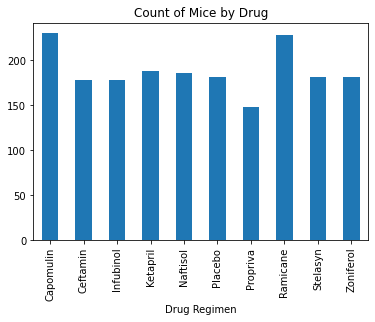

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
timepoints.plot.bar(x='Drug Regimen', y='Mouse ID')
plt.title("Count of Mice by Drug")

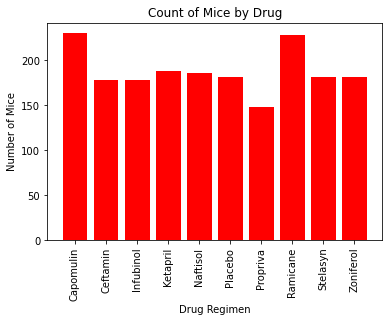

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = np.arange(len(mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]))
yaxis = timepoints
plt.bar(xaxis, yaxis, align="center", color='r')
ticks = [value for value in xaxis]
plt.xticks(ticks, timepoints.index.values, rotation=90)
plt.title("Count of Mice by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First I do a groupby by gender, taking only the Mouse ID
mouse_gender = mouse_data.groupby(["Sex"]).count()
mouse_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


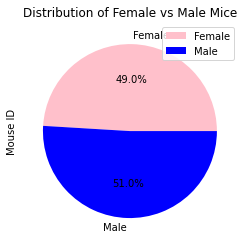

In [12]:
#Plot using pandas
gender_plot = mouse_gender.plot.pie(y='Mouse ID', title=("Distribution of Female vs Male Mice"), colors=["pink", "blue"], autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x164b95d7988>,
 [Text(-0.020992503472586185, -1.0997996703027118, 'Female'),
  Text(0.02099250347258632, 1.0997996703027118, 'Male')],
 [Text(-0.011450456439592464, -0.5998907292560246, '49.4%'),
  Text(0.011450456439592537, 0.5998907292560246, '50.6%')])

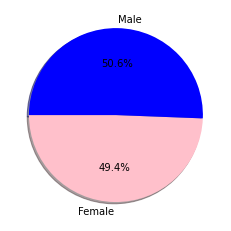

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [935, 958]
colors = ["pink", "blue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestvol = mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
greatestvol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data_max = pd.merge(greatestvol, mouse_data, on=(["Mouse ID", "Timepoint"]))
mouse_data_max.reset_index()
mouse_data_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = mouse_data_max.loc[mouse_data_max["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #For outliers, find if any data points are 1.5 times outside the inter quartile range. In other words 1.5 times / 
    #above or below the lower and upper quartile. 
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq - (1.5*iqr)
    
    #show what data points would be outliers by using a print statement
    print(f"For {treatment} results less than {lowerbound} and greater than {upperbound} the results would be outliers.")
    

For Capomulin results less than 20.70456164999999 and greater than 28.486425109999995 the results would be outliers.
For Ramicane results less than 17.912664470000003 and greater than 27.01120119 the results would be outliers.
For Infubinol results less than 36.83290494999999 and greater than 48.310040109999996 the results would be outliers.
For Ceftamin results less than 25.355449580000002 and greater than 40.93320176 the results would be outliers.


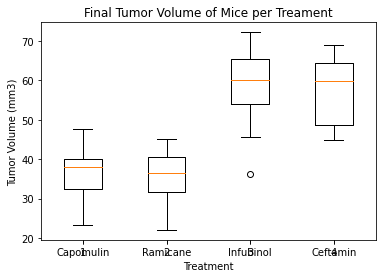

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice per Treament')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_xlabel('Treatment')
ax1.boxplot(tumor_vol_data)
plt.show()

There is an outlier in InfuBinol

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
# I chose the young female mouse: "s185","Capomulin","Female",3,17 (found her looking at CSV file)
#Finding data for my young female mouse
young_female_mouse = mouse_data.loc[mouse_data["Mouse ID"] == "s185"]
young_female_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


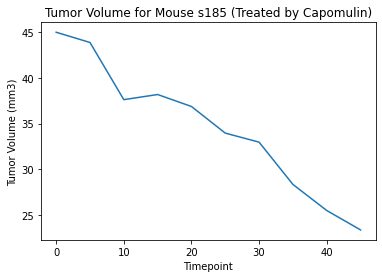

In [18]:
#plotting her data
xaxis_s185 = young_female_mouse["Timepoint"]
yaxis_s185 = young_female_mouse["Tumor Volume (mm3)"]
plt.plot(xaxis_s185, yaxis_s185)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Mouse s185 (Treated by Capomulin)")
plt.show()

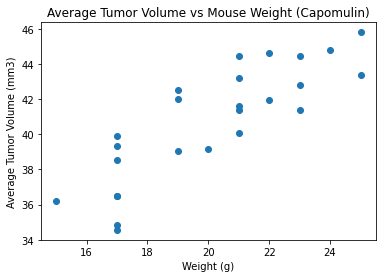

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#First I locate all mice treated by Capomulin
capomulin_treatment = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
#Then I find the mean of all columns (need only tumor volume)
avg_tumor_volume_capomulin =  capomulin_treatment.groupby(["Mouse ID"]).mean()
#Make the scatter plot
plt.scatter(avg_tumor_volume_capomulin["Weight (g)"], avg_tumor_volume_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight (Capomulin)")
plt.show()

## Correlation and Regression

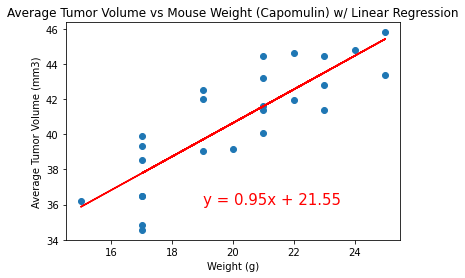

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen.
#Plot the linear regression model on top of the previous scatter plot.
#use the same x & y as above
x_values = avg_tumor_volume_capomulin["Weight (g)"]
y_values = avg_tumor_volume_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adding p
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight (Capomulin) w/ Linear Regression')
plt.show()